<a href="https://colab.research.google.com/github/Irakoze-A/Data_Preprocessing-Effects/blob/main/MissingDataImpute_OneHotEnc_MinMax_UnbalancedSampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from numpy import *
random.seed(1234)

from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Stroke Prediction/stroke_data.csv')
categorical = ['gender','smoking_status','work_type','Residence_type','ever_married']
df.head()

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI
0,Female,80.0,0,0,0,1,never,25.19
1,Female,54.0,0,0,0,0,NaN,NaN
2,Male,28.0,0,0,0,0,never,NaN
3,Female,36.0,0,0,0,0,current,23.45
4,Male,76.0,0,1,0,1,current,20.14


In [ ]:
df.shape

(100000, 8)

#### İstatistiksel özellikler

In [5]:
df.describe() 

,age,diabetes,hypertension,stroke,heart disease,BMI
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,74556.000000
mean,41.885856,0.085000,0.07485,0.014260,0.039420,27.321029
std,22.516840,0.278883,0.26315,0.118561,0.194593,7.686296
min,0.080000,0.000000,0.00000,0.000000,0.000000,10.010000
25%,24.000000,0.000000,0.00000,0.000000,0.000000,22.030000
50%,43.000000,0.000000,0.00000,0.000000,0.000000,26.500000
75%,60.000000,0.000000,0.00000,0.000000,0.000000,31.530000
max,80.000000,1.000000,1.00000,1.000000,1.000000,95.690000


#### Veri tipi 'Non-Null' olan verinin sayisi

In [7]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   gender           100000 non-null  object 
 1   age              100000 non-null  float64
 2   diabetes         100000 non-null  int64  
 3   hypertension     100000 non-null  int64  
 4   stroke           100000 non-null  int64  
 5   heart disease    100000 non-null  int64  
 6   smoking history  64184 non-null   object 
 7   BMI              74556 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 6.1+ MB


#### Eksik olan veri sayısı

In [8]:
df.isnull().sum()

gender                 0
age                    0
diabetes               0
hypertension           0
stroke                 0
heart disease          0
smoking history    35816
BMI                25444
dtype: int64

In [ ]:
df.isnull().sum()

gender                 0
age                    0
diabetes               0
hypertension           0
stroke                 0
heart disease          0
smoking history    35816
BMI                25444
dtype: int64

## I. EDA Analizi

### I.1 Hedef Değişken Dağılımı

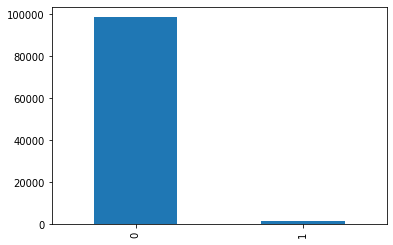

In [9]:
df['stroke'].value_counts().plot(kind = 'bar')

#### => Dengesiz datasetimiz var

In [10]:
print('Percentage of patients that had a stroke, {}'.format( (df['stroke'].value_counts()[0]  / len(df) )*100))

Percentage of patients that had a stroke, 98.574


In [11]:
print('Percentage of patients that didn\'t had a stroke {}'.format(df['stroke'].value_counts()[1] / len(df) *100 ))

Percentage of patients that didn't had a stroke 1.426


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f807beaf210>,
      dtype=object)

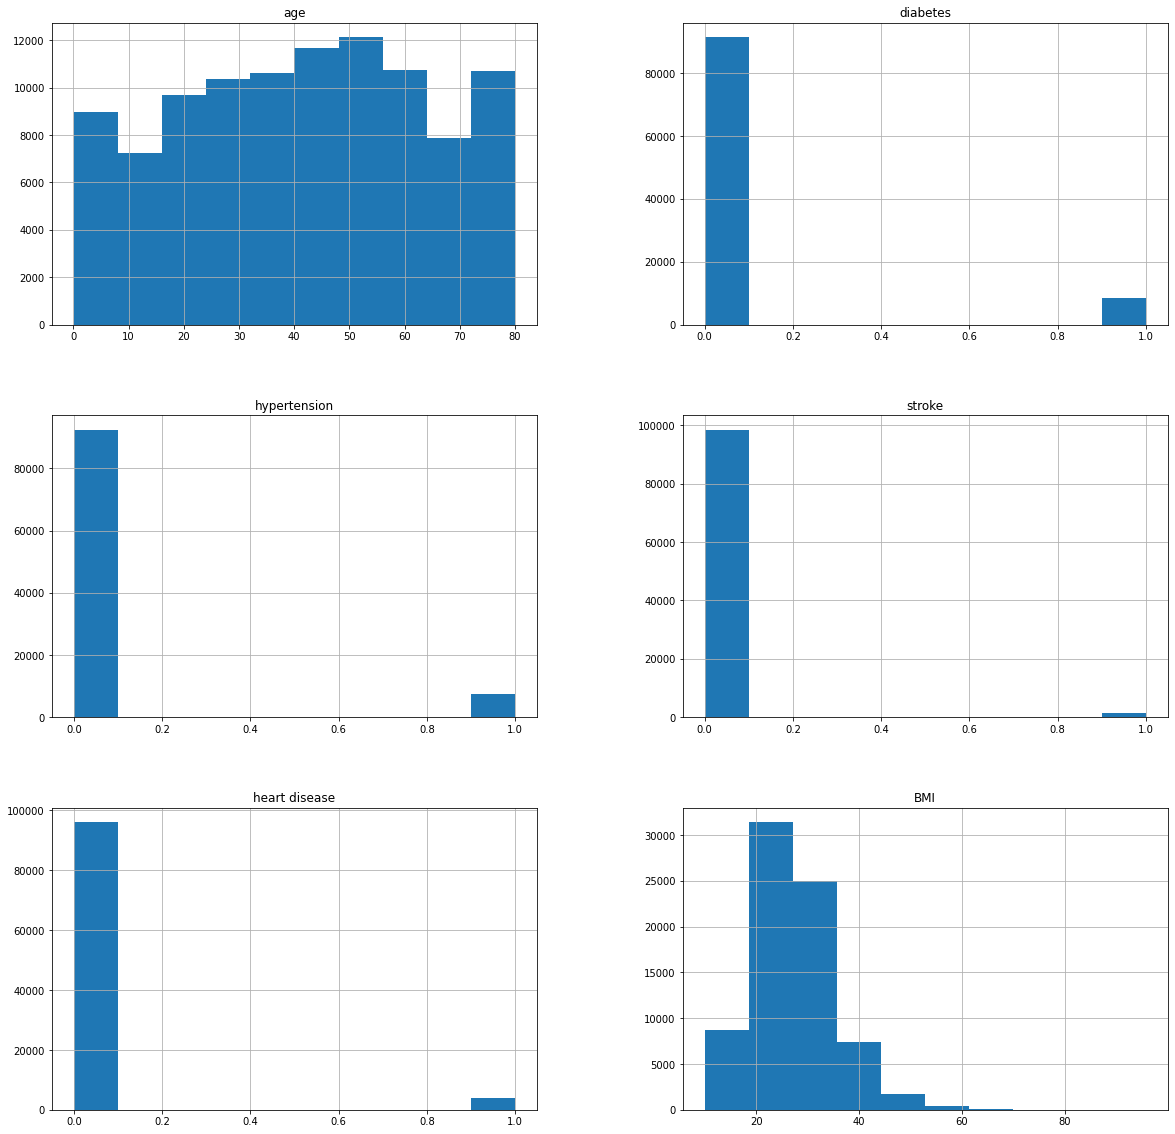

In [12]:
df.hist(figsize=(20,20))

### Korelasyon

In [13]:
df.corr()

,age,diabetes,hypertension,stroke,heart disease,BMI
age,1.000000,0.258008,0.251171,0.143748,0.233354,0.387541
diabetes,0.258008,1.000000,0.197823,0.086132,0.171727,0.237774
hypertension,0.251171,0.197823,1.000000,0.077651,0.121262,0.162858
stroke,0.143748,0.086132,0.077651,1.000000,0.102201,0.028356
heart disease,0.233354,0.171727,0.121262,0.102201,1.000000,0.068643
BMI,0.387541,0.237774,0.162858,0.028356,0.068643,1.000000


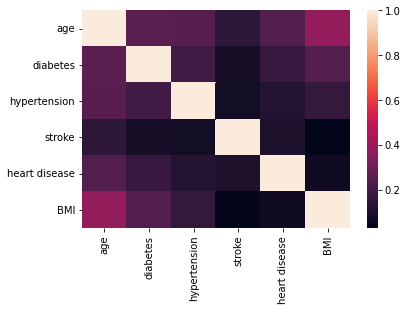

In [14]:
sns.heatmap(df.corr())

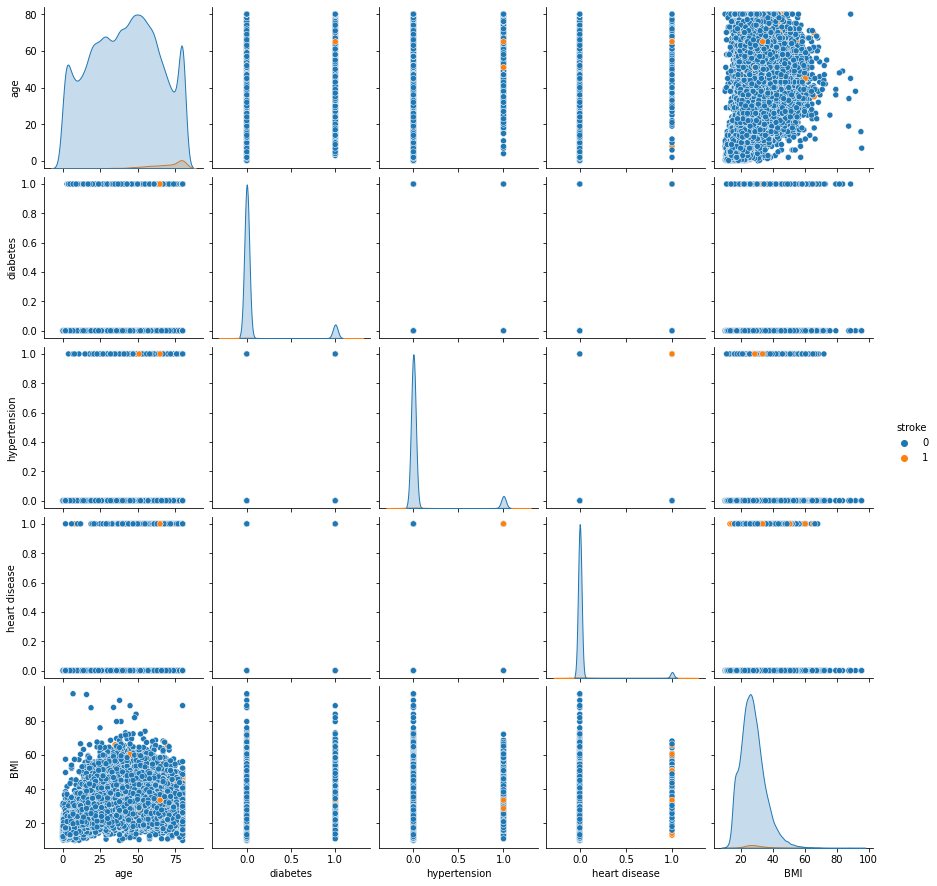

In [15]:
sns.pairplot(df, hue='stroke')

##  II. ÖN İŞLEME

### II.1. Eksik değeri 

In [ ]:
# df['bmi'].fillna(df['bmi'].mean(),inplace=True)
# df.isnull().sum()

def impute(df_pd):
  # impute BMI null records using BMI Distribution by Age Calculator for the United States
#reference: https://dqydj.com/bmi-distribution-by-age-calculator-for-the-united-states/


  df_2 = df_pd[(df_pd['age']>=2) & (df_pd['age']<=3)]
  value = {'BMI': 16.5}
  df_2 = df_2.fillna(value = value)

  df_4 = df_pd[(df_pd['age']>=4) & (df_pd['age']<=5)]
  value = {'BMI': 16.5}
  df_4 = df_4.fillna(value = value)

  df_6 = df_pd[(df_pd['age']>=6) & (df_pd['age']<=7)]
  value = {'BMI': 17.2}
  df_6 = df_6.fillna(value = value)

  df_8 = df_pd[(df_pd['age']>=8) & (df_pd['age']<=9)]
  value = {'BMI': 18.3}
  df_8 = df_8.fillna(value = value)

  df_10 = df_pd[(df_pd['age']>=10) & (df_pd['age']<=11)]
  value = {'BMI': 20.2}
  df_10 = df_10.fillna(value = value)

  df_12 = df_pd[(df_pd['age']>=12) & (df_pd['age']<=13)]
  value = {'BMI': 22.0}
  df_12 = df_12.fillna(value = value)

  df_14 = df_pd[(df_pd['age']>=14) & (df_pd['age']<=15)]
  value = {'BMI': 23.4}
  df_14 = df_14.fillna(value = value)
  df_16 = df_pd[(df_pd['age']>=16) & (df_pd['age']<=17)]
  value = {'BMI': 25.3}
  df_16 = df_16.fillna(value = value)

  df_18 = df_pd[(df_pd['age']>=18) & (df_pd['age']<=24)]
  value = {'BMI': 27.1}
  df_18 = df_18.fillna(value = value)

  df_25 = df_pd[(df_pd['age']>=25) & (df_pd['age']<=29)]
  value = {'BMI': 27.9}
  df_25 = df_25.fillna(value = value)

  df_30 = df_pd[(df_pd['age']>=30) & (df_pd['age']<=34)]
  value = {'BMI': 29.6}
  df_30 = df_30.fillna(value = value)

  df_35 = df_pd[(df_pd['age']>=35) & (df_pd['age']<=39)]
  value = {'BMI': 30.2}
  df_35 = df_35.fillna(value = value)
  df_40 = df_pd[(df_pd['age']>=40) & (df_pd['age']<=44)]
  value = {'BMI': 30.1}
  df_40 = df_40.fillna(value = value)

  df_45 = df_pd[(df_pd['age']>=45) & (df_pd['age']<=49)]
  value = {'BMI': 29.7}
  df_45 = df_45.fillna(value = value)

  df_50 = df_pd[(df_pd['age']>=50) & (df_pd['age']<=54)]
  value = {'BMI': 30.1}
  df_50 = df_50.fillna(value = value)

  df_55 = df_pd[(df_pd['age']>=55) & (df_pd['age']<=59)]
  value = {'BMI': 29.8}
  df_55 = df_55.fillna(value = value)

  df_60 = df_pd[(df_pd['age']>=60) & (df_pd['age']<=64)]
  value = {'BMI': 30.5}
  df_60 = df_60.fillna(value = value)

  df_65 = df_pd[(df_pd['age']>=65) & (df_pd['age']<=69)]
  value = {'BMI': 30.0}
  df_65 = df_65.fillna(value = value)

  df_70 = df_pd[(df_pd['age']>=70) & (df_pd['age']<=74)]
  value = {'BMI': 29.8}
  df_70 = df_70.fillna(value = value)

  df_75 = df_pd[(df_pd['age']>=75)]
  value = {'BMI': 28.1}
  df_75 = df_75.fillna(value = value)
  all_frames = [df_2, df_4, df_6, df_8, df_10, df_12, df_14, df_16, df_18, df_25, df_30, df_35, df_40, df_45, df_50, df_55, df_60, df_65, df_70, df_75]

  df_combined = pd.concat(all_frames)

  return df_combined


In [ ]:
df_imputed = impute(df)
df_imputed.isnull().sum()
df_imputed = df_imputed.dropna()
df_imputed = df_imputed.reset_index(drop=True)
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64024 entries, 0 to 64023
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           64024 non-null  object 
 1   age              64024 non-null  float64
 2   diabetes         64024 non-null  int64  
 3   hypertension     64024 non-null  int64  
 4   stroke           64024 non-null  int64  
 5   heart disease    64024 non-null  int64  
 6   smoking history  64024 non-null  object 
 7   BMI              64024 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 3.9+ MB


### II.2. Datasetin normalleştirme

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
df = df_imputed.reset_index(drop=True)
normalized_array = mmscaler.fit_transform(df_imputed[['age','BMI']])
normalized_df = pd.DataFrame(normalized_array, columns=['age','BMI'])
df_imputed[['age', 'BMI']] = normalized_df

df_imputed.dropna(inplace=True)
df_imputed.shape

(64024, 8)

### II.3. OneHot kodlanması

In [ ]:
df_encoded = pd.get_dummies(df_imputed,['gender','smoking history'])
df_encoded.columns

Index(['age', 'diabetes', 'hypertension', 'stroke', 'heart disease', 'BMI',
       'gender_Female', 'gender_Male', 'gender_Other',
       'smoking history_current', 'smoking history_ever',
       'smoking history_former', 'smoking history_never',
       'smoking history_not current'],
      dtype='object')

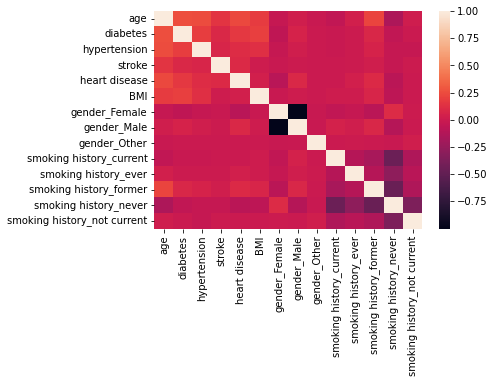

In [ ]:
df_encoded.corr()
sns.heatmap(df_encoded.corr())

## III. Modelleme

### III.1. Datasetin 'split' edilmesi

In [ ]:
# split into train-test and apply sampling on train data
df_combined = df_encoded.reset_index()

Y = df_combined['stroke']
X = df_combined.drop(['stroke'], axis=1)
col = X.columns


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN,  SMOTETomek

from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours

#undersampling
sm = EditedNearestNeighbours(n_neighbors=3)
X_train_sam, Y_train_sam = sm.fit_resample(X_train, Y_train)

#oversampling
sm = SMOTE()
X_train_sam, Y_train_sam = sm.fit_resample(X_train_sam, Y_train_sam)

print (X_train_sam.shape)
X_train_sam.dropna(inplace=True)
print (X_train_sam.shape)


df_X_train_sam = pd.DataFrame(X_train_sam,columns=col)
df_Y_train_sam = pd.DataFrame(Y_train_sam, columns = ['stroke'])



(95934, 14)
(95934, 14)


### III.3. Modelleri

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score,average_precision_score, roc_auc_score, accuracy_score

### a. Dengesiz (Imbalanced) Veriseti ile Modelleme

In [ ]:
from numpy import *
random.seed(1234)
#lr_model = LogisticRegression()
lrcv_model = LogisticRegressionCV(cv=5)
rf_model = RandomForestClassifier(max_depth=4, n_estimators=30)
dt_model = DecisionTreeClassifier(random_state=0)

models = [rf_model,dt_model,lrcv_model]
#models = [rf_model]

metric = roc_auc_score
for m in models :
  m.fit(df_X_train_sam,df_Y_train_sam)
  #m.fit(X_train,Y_train)
  predict = m.predict(X_test)
  print(metric(Y_test,m.predict(X_test)))
  #conf_matrix(Y_test,predict,m)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


0.7599073947977667
0.5205806422325996


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7021841809696602
